# 타이타닉 호 승객 생존 예측 미니 프로젝트

In [2]:
# 메시지 안나오게 설정
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np # numpy : c++로 작성되어 빠르다는 장점
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('./data/titanic.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 탐색적 데이터 분석 : 전처리, 결측치 확인, 시각화 등
### 참고) 머신러닝 딥러닝을 위해서는 데이터가 모두 숫자형이어야 함

- 생존영향요인 추측 : pclass = 선실등급, 성별, 나이, sibsp, parch

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


- age와 fare 결측 있음

In [7]:
2 ** 63

9223372036854775808

In [8]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<AxesSubplot:>

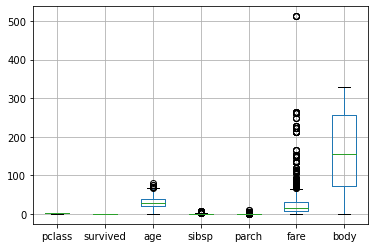

In [9]:
df.boxplot()

- 점들은 이상치
- 초록색 선 중앙값

In [12]:
df.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [11]:
# False(결측치가 아닌 것)는 0, True(결측치 인 것)는 1로 생각
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [16]:
# 운임 안낸 사람 출력
df[df['fare'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1225,3,0,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN


In [23]:
# 나이가 75세 이상인 사람 출력
df[df['age'] >= 75]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.00,A23,S,B,NaN,"Hessle, Yorks"
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.85,C46,S,6,NaN,"Little Onn Hall, Staffs"


In [25]:
# 생존여부 출력
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [32]:
# 성별 출력
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [30]:
# 생존하지 못한 사람들의 성별 출력
df[df['survived'] == 0]['sex'].value_counts()

male      682
female    127
Name: sex, dtype: int64

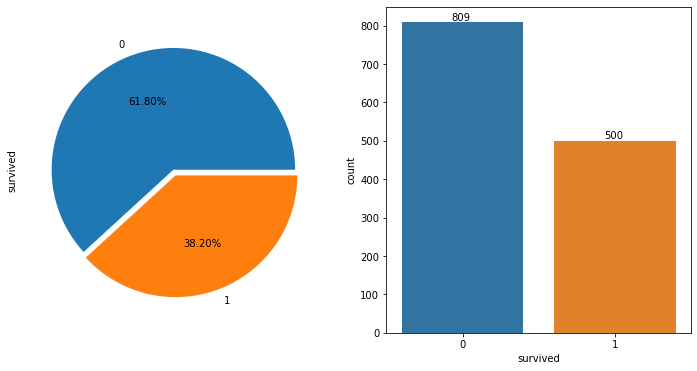

In [47]:
# plot 가로방향 12, 세로방향 6
plt.figure(figsize=(12, 6))
plt.subplot(121) # 1행 2열의 첫 번째
df['survived'].value_counts().plot.pie(explode=[0, 0.05], # explode : 0은 고정시키고, 1은 0.05만큼 떨어뜨린다
                                      autopct = "%.2f%%") # autopct : 퍼센트
plt.subplot(122) # 1행 2열의 두 번째
g1 = sns.countplot('survived', data=df)
for p in g1.patches:
    g1.annotate(f"{p.get_height()}", (p.get_x()+0.33, p.get_height()+5))
plt.savefig('survived1.png') # 이미지저장
plt.show()

### camel 표기법
- 객체 스타일
- ex. GetContent

### snake 표기법
- 함수 스타일
- ex. get_content

<AxesSubplot:>

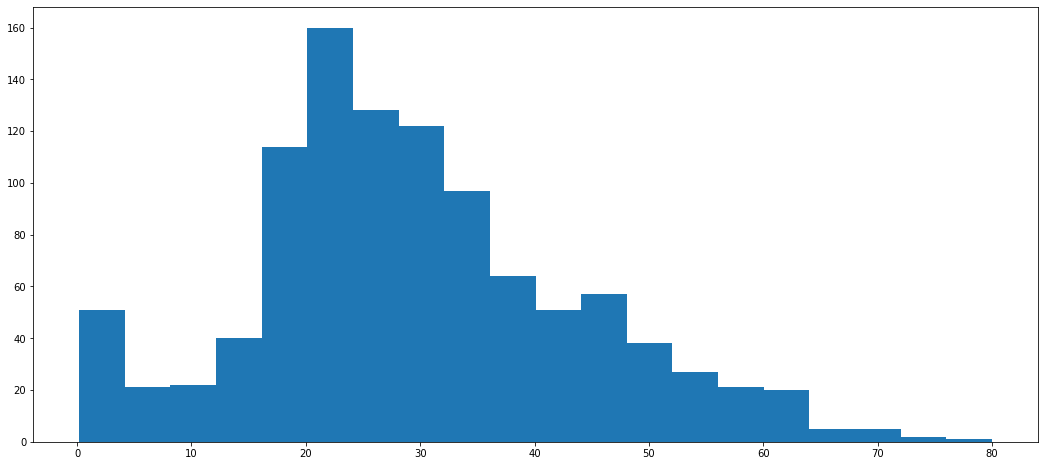

In [55]:
# 데이터프레임의 한 컬럼만 뽑으면 Series 형태로 나옴
df['age'].hist(bins=20, grid=False, figsize=(18,8))

In [56]:
# 성별 
df.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

In [58]:
df[['sex', 'survived']].groupby(['sex']).mean()

,survived
sex,
female,0.727468
male,0.190985


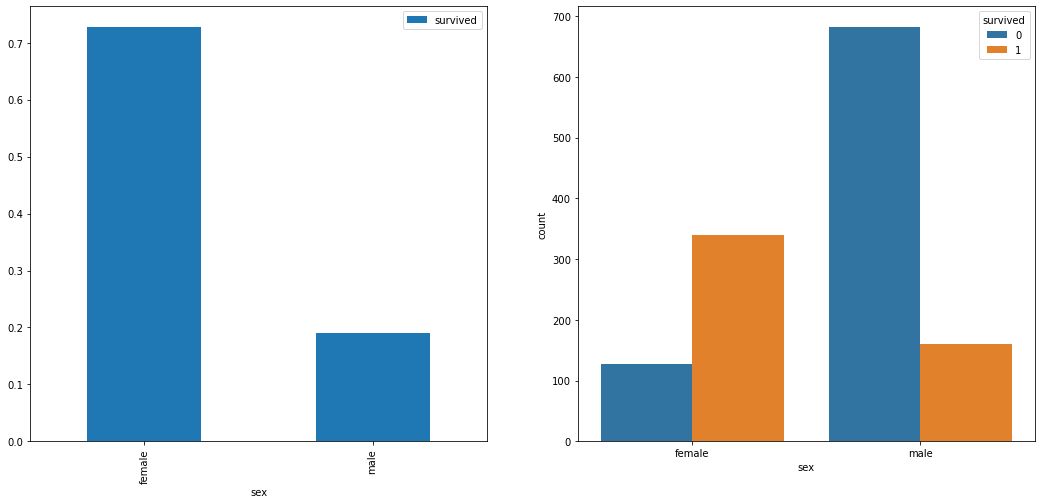

In [60]:
plt.figure(figsize=(18,8))
sub1 = plt.subplot(121)
df[['sex', 'survived']].groupby(['sex']).mean().plot.bar(ax=sub1)
plt.subplot(122)
sns.countplot('sex', hue='survived', data=df)
plt.show()

In [61]:
pd.crosstab(df['pclass'], df['survived']) # (행, 열)

survived,0,1
pclass,,
1,123,200
2,158,119
3,528,181


<AxesSubplot:xlabel='pclass'>

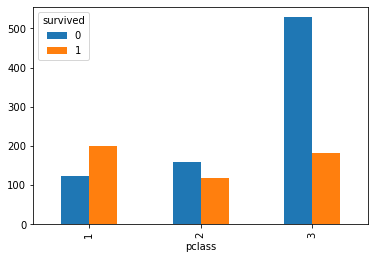

In [62]:
pd.crosstab(df['pclass'], df['survived']).plot.bar()

In [63]:
pd.crosstab(df['pclass'], df['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


In [65]:
df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


In [66]:
# 상관관계
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


- 선실등급이 높아질수록 생존률도 떨어진다
- 나이가 높아질수록 생존률도 떨어진다

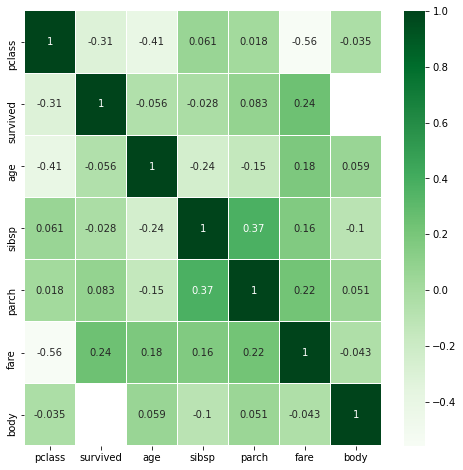

In [74]:
# 상관관계 -> 인과관계
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), linewidths=0.01, annot=True, cmap=plt.cm.Greens)
plt.show()

- seaborn examples : https://seaborn.pydata.org/examples/index.html

In [75]:
# 연령대 컬럼 추가, 0-9 / 10-19 / 20-49 / 50-79 / 80~
df['age_cat'] = pd.cut(df['age'], bins=[0,10,20,50,80], include_lowest=True,
                      labels=['baby', 'teenage', 'adult', 'old']) # include_lowest 낮은 값 기준으로 끊어줌
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


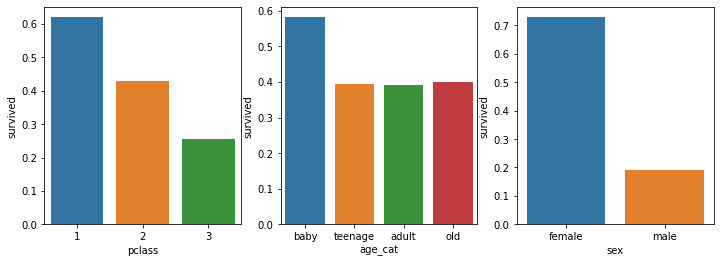

In [80]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.barplot('pclass', 'survived', data=df, ci=None) # 까만색 선은 +- 오차, 안보이게 하려면 ci=None
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=df, ci=None)
plt.subplot(133)
sns.barplot('sex', 'survived', data=df, ci=None)
plt.show()

In [81]:
df["sex"] = df['sex'].map({'female':1, 'male':0})
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


In [82]:
# 결측값 제거
df = df[df['fare'].notnull()]
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,teenage
1305,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,adult
1307,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,adult


In [83]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        2
boat          822
body         1188
home.dest     563
age_cat       263
dtype: int64

- age 결측치 평균값 처리
- Master : 이름에 있다면 귀족 아이

In [119]:
for i in df:
    df['initial'] = df['name'].str.extract("([A-Za-z]+)\.") # Miss. --> Miss

In [120]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,initial
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",adult,Miss
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",adult,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",adult,Mrs


In [121]:
# Mr, Mrs, Miss, Master(아이), Other
df['initial'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [122]:
np.sort(df['initial'].unique())

array(['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady',
       'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev',
       'Sir'], dtype=object)

In [123]:
initial = ['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady',
       'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Ms', 'Rev',
       'Sir']

In [124]:
before = ['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir']
after = ['Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Other', 'Mr', 'Mrs',
        'Mr', 'Miss', 'Mrs', 'Miss', 'Other', 'Mr']
df['initial'].replace(before, after, inplace=True)# df['initial'] = df['initial'].replace(before, after) 과 같음

In [125]:
df['initial']

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: initial, Length: 1308, dtype: object

In [126]:
df.groupby('initial')['age'].mean()

initial
Master     5.482704
Miss      21.904595
Mr        32.522034
Mrs       36.959538
Other     42.333333
Name: age, dtype: float64

In [128]:
df.loc[(df['age'].isnull()) & (df['initial']=='Master')]
# iloc는 index location

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,initial
672,3,0,"Betros, Master. Seman",0,NaN,0,0,2622,7.2292,NaN,C,NaN,NaN,NaN,NaN,Master
900,3,0,"Johnston, Master. William Arthur ""Willie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,NaN,NaN,Master
954,3,0,"Lefebre, Master. Henry Forbes",0,NaN,3,1,4133,25.4667,NaN,S,NaN,NaN,NaN,NaN,Master
1034,3,1,"Moubarek, Master. Gerios",0,NaN,1,1,2661,15.2458,NaN,C,C,NaN,NaN,NaN,Master
1035,3,1,"Moubarek, Master. Halim Gonios (""William George"")",0,NaN,1,1,2661,15.2458,NaN,C,C,NaN,NaN,NaN,Master
1121,3,1,"Peter, Master. Michael J",0,NaN,1,1,2668,22.3583,NaN,C,C,NaN,NaN,NaN,Master
1170,3,0,"Sage, Master. Thomas Henry",0,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,NaN,NaN,NaN,Master
1262,3,0,"van Billiard, Master. James William",0,NaN,1,1,A/5. 851,14.5000,NaN,S,NaN,NaN,NaN,NaN,Master


In [129]:
df.loc[(df['age'].isnull()) & (df['initial']=='Master'), 'age'] # 위에서 'age' 컬럼만 뽑기

672    NaN
900    NaN
954    NaN
1034   NaN
1035   NaN
1121   NaN
1170   NaN
1262   NaN
Name: age, dtype: float64

In [130]:
df.loc[(df['age'].isnull()) & (df['initial']=='Master'), 'age'] = 5
df.loc[(df['age'].isnull()) & (df['initial']=='Miss'), 'age'] = 22
df.loc[(df['age'].isnull()) & (df['initial']=='Mr'), 'age'] = 33
df.loc[(df['age'].isnull()) & (df['initial']=='Mrs'), 'age'] = 37
df.loc[(df['age'].isnull()) & (df['initial']=='Other'), 'age'] = 42

In [131]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        2
boat          822
body         1188
home.dest     563
age_cat       263
initial         0
dtype: int64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1308 non-null   int64   
 1   survived   1308 non-null   int64   
 2   name       1308 non-null   object  
 3   sex        1308 non-null   int64   
 4   age        1308 non-null   float64 
 5   sibsp      1308 non-null   int64   
 6   parch      1308 non-null   int64   
 7   ticket     1308 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1306 non-null   object  
 11  boat       486 non-null    object  
 12  body       120 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1045 non-null   category
 15  initial    1308 non-null   object  
dtypes: category(1), float64(3), int64(5), object(7)
memory usage: 165.0+ KB


# 데이터 x와 정답 y

In [136]:
# X
# [선실등급, 성별, 나이, 부부형제_수, 부모자식_수, 운임]
x_cols = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
X = df[x_cols].values
X

array([[  1.    ,   1.    ,  29.    ,   0.    ,   0.    , 211.3375],
       [  1.    ,   0.    ,   0.9167,   1.    ,   2.    , 151.55  ],
       [  1.    ,   1.    ,   2.    ,   1.    ,   2.    , 151.55  ],
       ...,
       [  3.    ,   0.    ,  26.5   ,   0.    ,   0.    ,   7.225 ],
       [  3.    ,   0.    ,  27.    ,   0.    ,   0.    ,   7.225 ],
       [  3.    ,   0.    ,  29.    ,   0.    ,   0.    ,   7.875 ]])

In [137]:
# y
y = df['survived'].values
y

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

---
## 여기까지 데이터 전처리
---
# ML 코딩 5단계

## 1. 훈련 데이터와 테스트 데이터 준비

### ! 주의 : overfitting, underfitting 주의 / overfit 보완 -> hyper parameter 튜닝

## 2. 머신러닝 알고리즘 선택


## 3. 훈련

## 4. 평가

## 5. 새 데이터로 예측

In [138]:
from sklearn.model_selection import train_test_split # scikit(과학도구) : 머신러닝 구사 / numpy -> scipy -> scikit-learn